## Importanto as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import yfinance as yf

In [2]:
style.use('seaborn-muted')

## Buscando dados

In [3]:
tickers = ['TOTS3.SA', 'POSI3.SA', 'SQIA3.SA', 'VLID3.SA', '^BVSP']
dados = pd.DataFrame()

for ticker in tickers:
    dados[ticker] = yf.download(ticker, start='2016-01-01')['Adj Close']

dados.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TOTS3.SA,POSI3.SA,SQIA3.SA,VLID3.SA,^BVSP
Date,,,,,
2016-01-04,9.460103,1.538804,2.188953,31.005209,42141.0
2016-01-05,9.413867,1.586593,2.169604,31.429403,42419.0
2016-01-06,9.648134,1.624824,2.176859,31.185881,41773.0
2016-01-07,9.395370,1.634382,2.140579,30.392492,40695.0
2016-01-08,9.416945,1.567477,2.152672,30.321789,40612.0


Eliminando dados faltantes

In [4]:
dados.isna().sum()

TOTS3.SA    0
POSI3.SA    0
SQIA3.SA    0
VLID3.SA    0
^BVSP       8
dtype: int64

In [5]:
dados.dropna(inplace=True)

## Retorno simples

In [6]:
retorno_simples = np.log(dados / dados.shift())
retorno_simples.dropna(inplace=True)
retorno_simples.head()

,TOTS3.SA,POSI3.SA,SQIA3.SA,VLID3.SA,^BVSP
Date,,,,,
2016-01-05,-0.004899,0.030583,-0.008879,0.013589,0.006575
2016-01-06,0.024581,0.023811,0.003339,-0.007778,-0.015346
2016-01-07,-0.026547,0.005865,-0.016807,-0.025770,-0.026145
2016-01-08,0.002294,-0.041797,0.005634,-0.002329,-0.002042
2016-01-11,-0.060031,0.012121,-0.014714,-0.077821,-0.016435


## Calculando a média dos betas do setor

Matriz de variância e covariância

In [7]:
cov = retorno_simples.cov() * 252
cov

,TOTS3.SA,POSI3.SA,SQIA3.SA,VLID3.SA,^BVSP
TOTS3.SA,0.151541,0.069942,0.070031,0.059037,0.053930
POSI3.SA,0.069942,0.444745,0.101584,0.095308,0.080233
SQIA3.SA,0.070031,0.101584,0.226471,0.087201,0.053316
VLID3.SA,0.059037,0.095308,0.087201,0.234919,0.064092
^BVSP,0.053930,0.080233,0.053316,0.064092,0.075004


Variância do mercado

In [8]:
var_ibov = retorno_simples['^BVSP'].var() * 252
var_ibov

0.07500371630243255

Betas individuais

In [9]:
for i in range(0, 5):
    cov_individual = cov['^BVSP'][0:i]
    betas = (cov_individual / var_ibov)

print(betas)

TOTS3.SA    0.719033
POSI3.SA    1.069715
SQIA3.SA    0.710840
VLID3.SA    0.854523
Name: ^BVSP, dtype: float64


In [10]:
print(type(betas))

<class 'pandas.core.series.Series'>


Média dos betas do setor

In [11]:
media_betas = betas.mean()
media_betas

0.8385276143822636

In [12]:
betas['MÉDIA DO SETOR'] = media_betas
betas

TOTS3.SA          0.719033
POSI3.SA          1.069715
SQIA3.SA          0.710840
VLID3.SA          0.854523
MÉDIA DO SETOR    0.838528
Name: ^BVSP, dtype: float64

## Plotando o gráfico

In [13]:
y = np.arange(0.2, 1.0, 0.2)
y

array([0.2, 0.4, 0.6, 0.8])

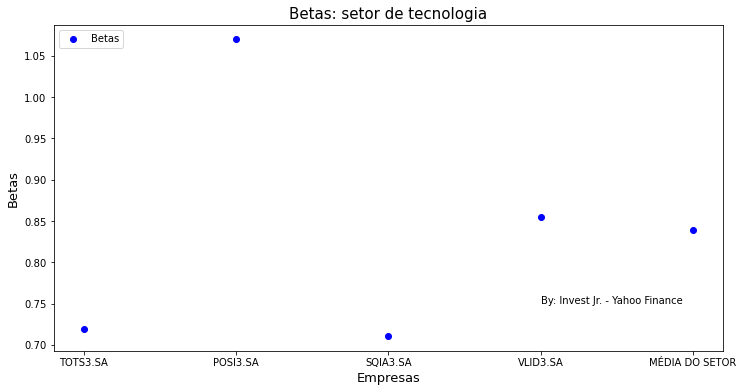

In [14]:
plt.figure(figsize=(12, 6));
plt.scatter(betas.index, betas, label='Betas', color='blue')
#plt.scatter(betas.index, media_betas)
plt.text(betas.index[3], 0.75, 'By: Invest Jr. - Yahoo Finance');
plt.title('Betas: setor de tecnologia', fontsize=15);
plt.xlabel('Empresas', fontsize=13);
plt.ylabel('Betas', fontsize=13);
plt.legend(loc=2);

SCRIP INCOMPLETO!